<a href="https://colab.research.google.com/github/gfeyzakorkmaz/Tries/blob/main/Pandas2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [6]:
path = '/content/drive/MyDrive/Dataset/complex_marketing_data_enriched.xlsx'

df = pd.read_excel(path)
df.head()

,Customer ID,Age,Gender,Total Spent,Converted,Comments,Purchased Category,Stock,Region,Income Level,Discount Availed,Customer Tenure (Years),Campaign,Return Rate (%),Website Visit Frequency,Average Cart Value
0,1,23,F,150,1,Satisfied with the service,Clothing,4,East,Medium,46,4,Winter Sale,2.981829,3,378.00
1,2,35,M,600,1,Needs improvement in delivery,Beauty,86,West,Low,61,12,Summer Sale,1.833412,6,315.52
2,3,45,F,800,0,Regular customer,Books,24,North,Medium,50,12,Black Friday,6.547401,0,250.69
3,4,52,M,200,0,Occasional buyer,Beauty,10,East,Medium,54,7,Winter Sale,3.923717,1,222.58
4,5,29,F,300,1,High spender,Books,47,East,Medium,63,12,Winter Sale,2.306644,4,298.68


In [7]:
category_spending = df.groupby('Purchased Category')['Total Spent'].sum()
print(category_spending)


Purchased Category
Beauty         1200
Books          2350
Clothing       1600
Electronics    1680
Home Goods     2090
Name: Total Spent, dtype: int64


In [8]:
income_analysis = df.groupby('Income Level')['Total Spent'].agg(['mean', 'sum', 'count'])
print(income_analysis)


                    mean   sum  count
Income Level                         
High          470.000000  1880      4
Low           448.333333  2690      6
Medium        435.000000  4350     10


In [9]:
improvement_comments = df[df['Comments'].str.contains('improvement', case=False)]
print(improvement_comments)


   Customer ID  Age Gender  Total Spent  Converted  \
1            2   35      M          600          1   

                        Comments Purchased Category  Stock Region  \
1  Needs improvement in delivery             Beauty     86   West   

  Income Level  Discount Availed  Customer Tenure (Years)     Campaign  \
1          Low                61                       12  Summer Sale   

   Return Rate (%)  Website Visit Frequency  Average Cart Value  
1         1.833412                        6              315.52  


In [10]:
df['Value Score'] = df['Total Spent'] * (1 + (df['Discount Availed'] / 100))
top_customers = df.nlargest(10, 'Value Score')
print(top_customers)


    Customer ID  Age Gender  Total Spent  Converted  \
17           18   35      M          700          1   
9            10   33      M          750          1   
2             3   45      F          800          0   
6             7   38      F          670          1   
1             2   35      M          600          1   
10           11   40      F          610          1   
14           15   36      F          510          1   
13           14   32      M          320          0   
8             9   50      F          500          0   
16           17   42      F          550          0   

                           Comments Purchased Category  Stock Region  \
17  Satisfied with customer service           Clothing     87   West   
9              High conversion rate           Clothing     45  South   
2                  Regular customer              Books     24  North   
6           Prefers online shopping         Home Goods     69  North   
1     Needs improvement in deliver

In [11]:
campaign_performance = df.groupby('Campaign')['Converted'].mean()
print(campaign_performance)


Campaign
Black Friday    0.000000
Summer Sale     0.500000
Winter Sale     0.777778
Name: Converted, dtype: float64


In [12]:
region_returns = df.groupby('Region')['Return Rate (%)'].mean()
print(region_returns)


Region
East     4.468599
North    5.438612
South    6.775497
West     3.873187
Name: Return Rate (%), dtype: float64


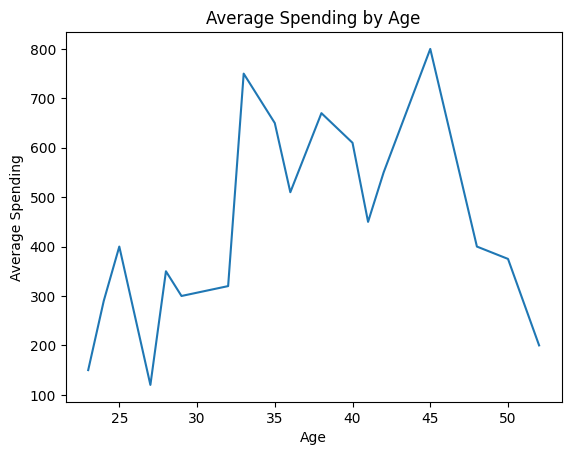

In [13]:
import matplotlib.pyplot as plt

age_spending = df.groupby('Age')['Total Spent'].mean()
age_spending.plot(title='Average Spending by Age', xlabel='Age', ylabel='Average Spending')
plt.show()


In [14]:
loyalty_analysis = df.groupby('Customer Tenure (Years)')['Total Spent'].mean()
print(loyalty_analysis)


Customer Tenure (Years)
1     750.000000
2     400.000000
3     120.000000
4     370.000000
6     625.000000
7     200.000000
8     535.000000
10    250.000000
12    566.666667
13    450.000000
14    425.000000
Name: Total Spent, dtype: float64


In [15]:
visit_cart_correlation = df[['Website Visit Frequency', 'Average Cart Value']].corr()
print(visit_cart_correlation)


                         Website Visit Frequency  Average Cart Value
Website Visit Frequency                 1.000000            0.082099
Average Cart Value                      0.082099            1.000000


In [17]:
low_stock_categories = df.groupby('Purchased Category')['Stock'].mean().nsmallest(5)
print(low_stock_categories)


Purchased Category
Beauty         32.000000
Clothing       45.333333
Home Goods     48.600000
Books          54.000000
Electronics    59.750000
Name: Stock, dtype: float64
